# CT5170 - Principles of Machine Learning
### Assignment 1
##### Daniel Verdejo - 22240224
___

1: _Have a look at the given data, understand the problem based on the dependent variable and select a machine learning category that can solve the task/problem.  Briefly explain why do you think it is the correct ML category for this problem?_

Answer:

The data provided is a subset of the Iris dataset which typically includes 3 species. We have both a training and test dataset for our neural network to consume. 

To solve the problem we will use a supervised learning classification task as we are provided 80 samples in total in a training dataset. 

Classification will enable us to organise our data in categorical sense based off predictions made about each sample the model is given. 

We first train the model with a dataset of known data, consisting of 2 classes with 40 samples per class (as seen below), each sample containing 4 attributes and the target label. The attributes are the sepal width and length (in cm), and the petal width and length (in cm). 

Once trained we will then need to feed it new data (data it has not yet seen) to measure its performance.
___

Lets begin...

In [32]:
import csv
import numpy as np
import keras as kr

training_samples = list(csv.reader(open('./plant-data/plant-train.csv')))[1:]
testing_samples = list(csv.reader(open('./plant-data/plant-test.csv')))[1:]

# the attributes will be our inputs - sepal width, sepal length, petal width, petal length 
training_attributes = np.array(training_samples)[:,:4].astype(float)
testing_attributes = np.array(testing_samples)[:,:4].astype(float)

# The classes will be our outputs
training_classes = np.array(training_samples)[:,4]
testing_classes = np.array(testing_samples)[:,4]

uniq_training_classes, output_indices, training_counts = np.unique(training_classes, return_counts=True, return_inverse=True)
print('training data: ', np.asarray((uniq_training_classes, training_counts)).T)

uniq_test_classes, test_counts = np.unique(testing_classes, return_counts=True)
print('\ntest data: ', np.asarray((uniq_test_classes, test_counts)).T)




training data:  [['setosa' '40']
 ['virginica' '40']]

test data:  [['setosa' '10']
 ['virginica' '10']]


2: _Explore and report the data and its distribution among training and testing data. Can we call it imbalanced dataset, explain your answer (yes/no) briefly?_

Answer:

No, we cannot say the provided dataset is imbalanced. As we can see above, both the training and testing datasets show a 50:50 ratio for each class. The dataset is perfectly balanced with no specific class showing a majority or minority in either the training or testing datasets.
___

3: _Research and write down about open-source machine learning package that are freely available, and select one that you think will be good and easy for this task. Your report should include a short overview of the main features of the package you have chosen._ 

Answer:

Some of the most popular machine learing libraries for python are as follows:

**TensorFlow** - Developed by Google, written in Python and C++, it offers a free and open-source library used for artificial intelligence and machine learning applications. The library offers both a high-level and low-level API to users to enable creating machine leanring models which can be run on many different host devices including, cloud, desktop, mobile or even on edge devices. It offers tools to validate and transform large datasets, and tools to discover and remove bias in data to improve outcomes on models. Tensoflow offers in depth API documentation and learning materials for users of all experience levels.

**Keras** - Is a machine learning API written purely in Python, which runs on top of the TensorFlow platform. It offers an easy to use high-level API which abstracts some of the more complex functionality of TensorFlow. Keras offers a quick and easy way to get up and running for smaller projects.

It was built with simplicity in mind to promote fast prototyping via user friendliness, modularity and extensibility. Supports convolutional and recurrent networks, and can utilise either the host CPU or GPU for computational work.


**PyTorch** - Developed by the Linux Foundation and Meta AI (a branch of Meta, formerly Facebook) was released in September 2016. The library is written in Python, CUDA and C++, and offers a machine learning framework based on the Torch library. It can be used to develop machine learning applications and also offers capabilities for the creation of REST API endpoint to ease application integration. It only offers low level apis so it can be more difficult to use than Keras.


The machine learning library that I will be using here is [Keras](https://keras.io/). Its ease of use makes carrying out tasks like the one we are tackling today quick and easy. 

Using the Keras library over something like the TensorFlow or PyTorch libraries will reduce the amount of effort on my part to build the neural network, and should also be fairly easy to read and understand for you, the reader. As this dataset is quite small and relatively trivial using one of the other options, while they may operate faster, would add an unnecessary level of complexity as we should not need to dig into the lower level apis, or spend a lot of time debugging our neural network.

4: _In order to use the dataset (Plant-dataset) supplied below, you might need to do some work to prepare it for input into the ML package, depending on the ML category requirements. Document any data preparation (e.g. normalisation) steps in your report._



Some preparation of the dataset is required, we first got our attributes above like so: `attributes = np.array(training_samples)[:,:4].astype(np.float)` these our inputs.

Next we got our classes: `training_classes = np.array(training_samples)[:,4]` these will be our outputs.

Above we used `uniq_training_classes, inverse, training_counts = np.unique(training_classes, return_counts=True, return_inverse=True)` for  the training dataset to view how the data is distributed among the 2 class in both datasets. We also got the indicies of the unique array. This consists of 0 and 1s which points us to the index for each output. As we can see below.




In [33]:
print(output_indices)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]


5: _From the ML package, select two different algorithms from the category you selected and apply to the dataset. In your report, include a clear description of both algorithms. Ensure that you acknowledge all of your sources of information.
Report the results with and without normalisation of the data._

For our neural network we will use the Sigmoid and Softmax activation functions.

**The Sigmoid Activation function**

Formula:

$ f(x) = 1 / 1+e^{-x} $

The sigmoid function itself exists between 0 and 1 and takes an S shape curve. Since we are attempting to predict between 0 and 1 as we have just seen above from our `output_indices` list, the sigmoid activation function is the best fit here.

This function is used in logistic regression to classify data. It takes a numeric input value and maps it to a probability between 0 and 1 like so: If the value is above 0.5 its 1, otherwise if its below 0.5 it 0 (rounding up or down to the nearest whole number). 

[Reference: O'Reilly - Introduction to Machine Learning with R: Scott V. Berger, Chapter 2: Supervised and Unsupervised Machine Learning - Neural Networks, Pages 35-36.](https://www.oreilly.com/library/view/introduction-to-machine/9781491976432/)

[Reference: O'Reilly - Introduction to Machine Learning with R: Scott V. Berger, Chapter 4: Regression in a Nutshell - The Sigmoid Function, Page 94.](https://www.oreilly.com/library/view/introduction-to-machine/9781491976432/)

We can plot out the Sigmoid activation funtion using matplotlib and the equation: 


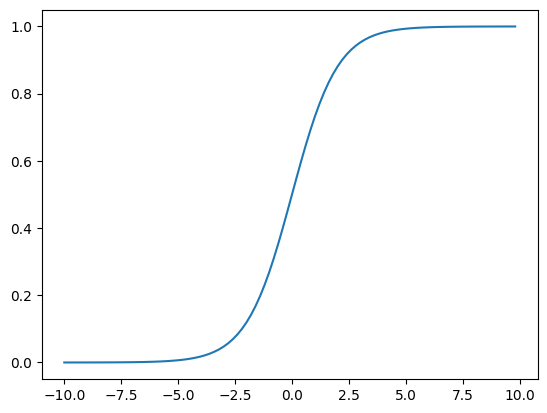

In [34]:
from matplotlib.pyplot import plot, show
from math import exp
        
xAxis = np.arange(-10., 10., 0.2)
sigmoid = [ 1/(1+exp(-item)) for item in xAxis]

plot(xAxis, sigmoid)
show()


**Softmax output layer**

Formula:
$ f(x)_i = e^{x_i} / \sum^k _{j=1}   e^{x_j} $

We want our output to be a probability distribution over a collection of classes. In this example we have 2 mutually exclusive classes `Setosa` and `Virginica`. Although it is not likely that the neural network will be able to predict the output with 100% accuracy, when we use a probability distribution we have a better idea of how accurate our predictions are. The output of a node in a softmax layer is dependant on all of the other nodes outputs in its layer as we require the sum of all outputs.

[Reference: O'Reilly - Fundamentals of Deep Learning: Nikhil Buduma, Chapter 1: The Neural Network - Softmax Output Layer, Page 15.](https://www.oreilly.com/library/view/fundamentals-of-deep/9781492082170/)


6: _Train and test your chosen algorithms using the training set provided in plant-train.csv. You should then test your trained models using the test set provided in plant-test.csv. Report on the results with appropriate performance metric e.g. accuracy that you consider best for each model on the training set and on the test set. Also include details of the classification models constructed – these may include graphics if appropriate._

We're going to create a neural network which will take 4 inputs (our 4 attributes: sepal width, sepal length, petal width, petal length). Then pass it through each layer, these layers contain nodes which are computational points. We add an activation function to each layer (sigmoid in this case) to be able to make these calculations. Finally they will be passed to the output layer in this case as a 0 (setosa) or 1 (virginica). 

Our neural network will resemble something like so:

![neural net](assets/Neural_net.drawio.svg)

In [35]:
# Create a sequential model
model = kr.models.Sequential()

#add our initial layer with an input for each of our attributes (4), and a hidden layer with 16 nodes
model.add(kr.layers.Dense(16, input_shape=(4,)))

# apply an activation function to the layer
model.add(kr.layers.Activation('sigmoid'))

# add our output layer with one node for each class
model.add(kr.layers.Dense(2))

# apply an activation function to the output layer sigmoid should be fine here
model.add(kr.layers.Activation('softmax'))



We will use an optimizer with the aim to maximize the performance of our model by making iterative adjustments to its parameters to minimize error. This means we will avoid having to use a gradient descent strategy to minimize error.

With gradient descent we would evaluate the gradient at a given starting position, find and travel in the direction of the steepest descent, from this new position we would repeat this process, continuing until we get to a point of minimum error. 

Thankfully, we do not have to worry about this when we use the Adam optimizer. Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure in order to update network weights based on training data. 
The Adam algorithm calculates the exponentially weighted moving average of the gradient, and it estimates a vector in of the first moment of the gradient. In the second moments of the gradient another vector is estimated and the moving average of the historical gradients. The estimation of the vectors initial values to zero result in a bias relative to the real moments, thus a correction factor for both vector estimations is derived. This is Adam's corrective measure against the zero initialization bias.

[Reference: O'Reilly - Fundamentals of Deep Learning: SNikhil Buduma, Chapter 2: Training Feed-Forward Neural Networks - Gradient Descent, Pages 19 - 20.](https://www.oreilly.com/library/view/fundamentals-of-deep/9781492082170/)

[Reference: O'Reilly - Fundamentals of Deep Learning: SNikhil Buduma, Chapter 4: Beyond Gradient Descent - Adam-Combining momentum and RMSProp, Page 81.](https://www.oreilly.com/library/view/fundamentals-of-deep/9781492082170/)


We will compile the the data using the Adam optimizer, and categorical cross entropy, for multi-class classification where each sample belongs to a single class.

In [40]:


# configure the model for training
# uses the adam optimizer and categorial cross entropy as the loss function
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

#fit the model using our training data
model.fit(training_attributes, training_classes, epochs=100, batch_size=1, verbose=1)
#evaluate the model using the test data set
loss, accuracy = model.evaluate(testing_attributes, testing_classes, verbose=1)

Epoch 1/100


ValueError: in user code:

    File "c:\Users\danny\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\danny\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\danny\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\danny\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\danny\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\Users\danny\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\danny\anaconda3\envs\tensorflow\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\danny\anaconda3\envs\tensorflow\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\danny\anaconda3\envs\tensorflow\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\danny\anaconda3\envs\tensorflow\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (1, 1) and (1, 2) are incompatible



7: _Discuss in your report whether the two models give very similar or significantly different results, and why._